In [1]:
import numpy as np
import pandas as pd

In [2]:
# Import Austin Animal Center intakes and outcomes - 
aac_df = pd.read_csv("aac_intakes_outcomes.csv")[[
    'animal_id_outcome',
    'outcome_type',
    'sex_upon_outcome',
    'age_upon_outcome_(days)',
    'outcome_month',
    'intake_number',
    'animal_id_intake',
    'animal_type',
    'breed',
    'color',
    'intake_condition',
    'intake_type',
    'sex_upon_intake',
    'age_upon_intake_(days)',
    'intake_month',
    'time_in_shelter_days', # goal
]]

print(aac_df.shape)
aac_df.head()

(79672, 16)


,animal_id_outcome,outcome_type,sex_upon_outcome,age_upon_outcome_(days),outcome_month,intake_number,animal_id_intake,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(days),intake_month,time_in_shelter_days
0,A006100,Return to Owner,Neutered Male,3650,12,1.0,A006100,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,3650,12,0.588194
1,A006100,Return to Owner,Neutered Male,2555,12,2.0,A006100,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,2555,12,1.259722
2,A006100,Return to Owner,Neutered Male,2190,3,3.0,A006100,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,2190,3,1.113889
3,A047759,Transfer,Neutered Male,3650,4,1.0,A047759,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,3650,4,4.970139
4,A134067,Return to Owner,Neutered Male,5840,11,1.0,A134067,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,5840,11,0.119444


In [3]:
#check unmatching animal ids
print(aac_df[aac_df['animal_id_outcome'] != aac_df['animal_id_intake']].shape)

#remove duplicate id column
aac_df.rename(columns={"animal_id_outcome": "animal_id"}, inplace=True)
aac_df.drop(columns=['animal_id_intake'], inplace=True)
print(aac_df.shape)
aac_df.head()

(0, 16)
(79672, 15)


,animal_id,outcome_type,sex_upon_outcome,age_upon_outcome_(days),outcome_month,intake_number,animal_type,breed,color,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(days),intake_month,time_in_shelter_days
0,A006100,Return to Owner,Neutered Male,3650,12,1.0,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,3650,12,0.588194
1,A006100,Return to Owner,Neutered Male,2555,12,2.0,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,2555,12,1.259722
2,A006100,Return to Owner,Neutered Male,2190,3,3.0,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,2190,3,1.113889
3,A047759,Transfer,Neutered Male,3650,4,1.0,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,3650,4,4.970139
4,A134067,Return to Owner,Neutered Male,5840,11,1.0,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,5840,11,0.119444


In [4]:
#keep only cat and dog data
aac_df = aac_df[(aac_df['animal_type'] == 'Dog') | (aac_df['animal_type'] == 'Cat')]

print(aac_df.shape)

(74905, 15)


In [5]:
#remove animals with no information about age
print(len(aac_df[aac_df['age_upon_outcome_(days)'] == 0]))
aac_df = aac_df[aac_df['age_upon_outcome_(days)'] != 0]
print(aac_df.shape)

79
(74826, 15)


In [6]:
#remove outliers (aged animals younger than 3 years old)
print(len(aac_df[(aac_df['intake_condition'] == 'Aged') & (aac_df['age_upon_intake_(days)'] < 1095)]))
aac_df = aac_df[(aac_df['intake_condition'] != 'Aged') | (aac_df['age_upon_intake_(days)'] >= 1095)]

print(aac_df.shape)

3
(74823, 15)


In [7]:
aac_df = aac_df[(aac_df['sex_upon_intake'] == 'Neutered Male') | (aac_df['sex_upon_intake'] == 'Spayed Female') | (aac_df['sex_upon_intake'] == 'Intact Female') | (aac_df['sex_upon_intake'] == 'Intact Male') ]

aac_df = aac_df[(aac_df['sex_upon_outcome'] == 'Neutered Male') | (aac_df['sex_upon_outcome'] == 'Spayed Female') | (aac_df['sex_upon_outcome'] == 'Intact Female') | (aac_df['sex_upon_outcome'] == 'Intact Male') ]

In [8]:
aac_df['sex'] = np.where(aac_df['sex_upon_outcome'].str.contains('Male'), 'Male', 'Female')
aac_df['is_sterilized'] = np.where(aac_df['sex_upon_outcome'].str.contains('Intact'), 0, 1)

aac_df['sex_intake'] = np.where(aac_df['sex_upon_intake'].str.contains('Male'), 'Male', 'Female')
aac_df['is_sterilized_upon_intake'] = np.where(aac_df['sex_upon_intake'].str.contains('Intact'), 0, 1)

print(len(aac_df[aac_df['sex'] != aac_df['sex_intake']]))

0


In [9]:
aac_df['is_sterilized_in_shelter'] = np.where(aac_df['is_sterilized_upon_intake'] == aac_df['is_sterilized'], 0, 1)

aac_df.drop(columns=['sex_intake', 'sex_upon_intake', 'sex_upon_outcome', 'is_sterilized_upon_intake'], inplace=True)

## Proveriti

Trebalo bi ostaviti samo podatke o udomljenim zivotinjama, jer ako hocemo da predvidimo duzinu ostanka u azilu, mi zapravo ne znamo koji ce njen krajnji ishod biti i trebalo bi podeliti podatke i trenirati odvojene modele ako bismo hteli da prediktujemo sve (u tom slucaju za novu zivotinju ako zelimo da predvidimo duzinu njenogboravka u azilu, pustili bismo njene podatke i izvrsili predikciju krajnjim modelom - njen najverovatniji ishod bi bio onaj, ciji model pokaze najkracu duzinu ostanka). Nema potrebe za komplikovanjem, fokusirati se samo na zivotinje kojima je iskod udomljvanje - sto je i cilj azila za zivotinje.

In [10]:
#keep only adopted animals
aac_df = aac_df[aac_df['outcome_type'] == 'Adoption']
aac_df.drop(columns=['outcome_type'], inplace=True)

print(aac_df.shape)

(33251, 15)


Starosne grupe kao kategoricki atribut - jer nema stalni trend - samo zbog vrlo mladih zivotinja koje nisu spremne za udomljavanje

Da li se vrlo mlade zivotinje mogu drugacije resiti?

In [11]:
def categorise(row):  
    if row['age_upon_intake_(days)'] >= 0 and row['age_upon_intake_(days)'] < 60:
        return '0-1 months'
    elif row['age_upon_intake_(days)'] >= 60 and row['age_upon_intake_(days)'] < 180:
        return '2-5 months'
    elif row['age_upon_intake_(days)'] >= 180 and row['age_upon_intake_(days)'] < 365:
        return '6-11 months'
    elif row['age_upon_intake_(days)'] >= 365 and row['age_upon_intake_(days)'] < 1095:
        return '1-2 years'
    elif row['age_upon_intake_(days)'] >= 1095 and row['age_upon_intake_(days)'] < 2190:
        return '3-5 years'
    elif row['age_upon_intake_(days)'] >= 2190 and row['age_upon_intake_(days)'] <= 4015:
        return '6-10 years'
    elif row['age_upon_intake_(days)'] > 4015:
        return '10+ years'
    return '?'

In [12]:
aac_df['age_group_upon_intake'] = aac_df.apply(lambda row: categorise(row), axis=1)

Udomljene zivotinje po kategorijama - grafik iz Data Wrangling + Eda notebook-a.

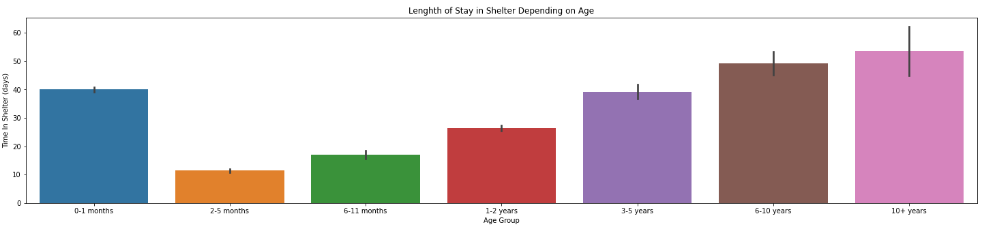

In [13]:
# nepoznato u trenutku predikcije, rezultat je poznatog podatka (age_upon_intake) i ciljnog obelezja (time_in_shelter)
aac_df.drop(columns=['age_upon_outcome_(days)'], inplace=True)
aac_df.drop(columns=['outcome_month'], inplace=True)

In [14]:
aac_df.head(10)

,animal_id,intake_number,animal_type,breed,color,intake_condition,intake_type,age_upon_intake_(days),intake_month,time_in_shelter_days,sex,is_sterilized,is_sterilized_in_shelter,age_group_upon_intake
12,A200922,1.0,Dog,Dachshund Mix,Black/Tan,Normal,Owner Surrender,5840,10,49.747917,Male,1,0,10+ years
14,A210457,1.0,Dog,Chihuahua Shorthair,Tan/Black,Aged,Public Assist,6205,9,9.020139,Male,1,0,10+ years
22,A226069,1.0,Dog,Labrador Retriever/Beagle,Sable/White,Normal,Stray,5475,10,23.104861,Male,1,0,10+ years
32,A249087,1.0,Dog,German Shepherd Mix,Black/Brown,Normal,Stray,5475,8,89.855556,Female,1,0,10+ years
48,A274546,1.0,Dog,Pointer Mix,Tricolor,Normal,Stray,4015,11,2.755556,Female,1,0,6-10 years
53,A281542,1.0,Dog,Labrador Retriever Mix,Black/Brown Brindle,Normal,Owner Surrender,4380,12,146.964583,Male,1,0,10+ years
54,A282897,1.0,Cat,Domestic Shorthair Mix,Black Smoke/White,Normal,Owner Surrender,4745,7,5.071528,Male,1,0,10+ years
55,A282897,2.0,Cat,Domestic Shorthair Mix,Black Smoke/White,Normal,Stray,4380,11,37.138889,Male,1,0,10+ years
70,A295822,1.0,Cat,Domestic Longhair Mix,Black,Normal,Stray,4380,11,174.189583,Female,1,0,10+ years
75,A302820,1.0,Dog,German Shepherd Mix,Brown,Normal,Owner Surrender,3650,2,147.842361,Female,1,0,6-10 years


## CATS

In [15]:
cats_df = aac_df[aac_df['animal_type'] == 'Cat']
cats_df = cats_df.drop(columns=['animal_type'])
print(cats_df.shape)
cats_df = cats_df.reset_index()
del cats_df['index']
cats_df.head()

(12671, 13)


,animal_id,intake_number,breed,color,intake_condition,intake_type,age_upon_intake_(days),intake_month,time_in_shelter_days,sex,is_sterilized,is_sterilized_in_shelter,age_group_upon_intake
0,A282897,1.0,Domestic Shorthair Mix,Black Smoke/White,Normal,Owner Surrender,4745,7,5.071528,Male,1,0,10+ years
1,A282897,2.0,Domestic Shorthair Mix,Black Smoke/White,Normal,Stray,4380,11,37.138889,Male,1,0,10+ years
2,A295822,1.0,Domestic Longhair Mix,Black,Normal,Stray,4380,11,174.189583,Female,1,0,10+ years
3,A304036,2.0,Domestic Shorthair Mix,Brown Tabby/White,Normal,Stray,4745,6,8.065972,Male,1,0,10+ years
4,A307592,1.0,Domestic Longhair Mix,Orange Tabby/White,Normal,Owner Surrender,4380,5,21.161806,Male,1,0,10+ years


In [16]:
breed_df = cats_df[['animal_id', 'breed', 'color']].copy()
breed_df['count'] = 1

In [17]:
#cats_df['is_multicolor'] = np.where(cats_df['color'].str.contains('/'), 1, 0)
#cats_df[cats_df['is_multicolor'] == 1].count()

In [18]:
breed_df.groupby(['breed'])[['count']].sum().sort_values(by='count', ascending=False).head(50)

,count
breed,
Domestic Shorthair Mix,9862
Domestic Medium Hair Mix,1037
Domestic Longhair Mix,578
Siamese Mix,455
Domestic Shorthair,178
American Shorthair Mix,79
Snowshoe Mix,69
Domestic Medium Hair,62
Maine Coon Mix,55


In [19]:
def categorise_colour(row):
    if 'Brown Tabby' in row['color']:
        return 'Brown'
    elif 'Black Tabby' in row['color']:
        return 'Brown'
    elif 'Black' in row['color']:
        return 'Black'
    elif 'Brown' in row['color']:
        return 'Chocolate'
    elif 'Chocolate' in row['color']:
        return 'Chocolate'
    elif 'Sable' in row['color']:
        return 'Chocolate'
    elif 'Calico' in row['color']:
        return 'Calico'
    elif 'Blue Cream' in row['color']:
        return 'Torbie'
    elif 'Blue/Orange' in row['color']:
        return 'Torbie'
    elif 'Tortie' in row['color']:
        return 'Torbie'
    elif 'Torbie' in row['color']:
        return 'Torbie'
    elif 'Orange' in row['color']:
        return 'Orange'
    elif 'Cream' in row['color']:
        return 'Orange'
    elif 'Tan' in row['color']:
        return 'Orange'
    elif 'Apricot' in row['color']:
        return 'Orange'
    elif 'Fawn' in row['color']:
        return 'Orange'
    elif 'Blue' in row['color']:
        return 'Blue'
    elif 'Grey' in row['color']:
        return 'Blue'
    elif 'Gray' in row['color']:
        return 'Blue'
    elif 'Silver' in row['color']:
        return 'Blue'
    elif 'Lynx Point' in row['color']:
        return 'Brown'
    elif 'Seal Point' in row['color']:
        return 'Chocolate'
    elif 'Flame Point' in row['color']:
        return 'Orange'
    elif 'Lilac Point' in row['color']:
        return 'Blue'
    elif 'Agouti' in row['color']:
        return 'Brown'
    elif 'White' in row['color']:
        return 'White'
    return '?'

In [20]:
cats_df['colour'] = cats_df.apply(lambda row: categorise_colour(row), axis=1)

In [21]:
def categorise_pattern(row):  
    if '/' in row['color']:
        return 'Multicolor'
    elif 'Tabby' in row['color']:
        return 'Tabby'
    elif 'Point' in row['color']:
        return 'Point'
    elif 'Calico' in row['color']:
        return 'Multicolor'
    elif 'Tortie' in row['color']:
        return 'Multicolor'
    elif 'Torbie' in row['color']:
        return 'Multicolor'
    elif 'Blue Cream' in row['color']:
        return 'Multicolor'
    elif 'Blue/Orange' in row['color']:
        return 'Multicolor'
    return 'Plain'

In [22]:
cats_df['pattern'] = cats_df.apply(lambda row: categorise_pattern(row), axis=1)

In [23]:
def categorise_hair(row):  
    if 'Shorthair' in row['breed']:
        return 'Shorthair'
    elif 'Medium Hair' in row['breed']:
        return 'Medium Hair'
    elif 'Longhair' in row['breed']:
        return 'Longhair'
    elif 'Siamese' in row['breed']:
        return 'Shorthair'
    elif 'Snowshoe' in row['breed']:
        return 'Shorthair'
    elif 'Russian Blue' in row['breed']:
        return 'Shorthair'
    elif 'Maine Coon' in row['breed']:
        return 'Longhair'
    elif 'Himalayan' in row['breed']:
        return 'Longhair'
    elif 'Manx' in row['breed']:
        return 'Medium Hair'
    elif 'Bengal' in row['breed']:
        return 'Shorthair'
    elif 'Japanese Bobtail' in row['breed']:
        return 'Medium Hair'
    elif 'Balinese' in row['breed']:
        return 'Longhair'
    elif 'Ragdoll ' in row['breed']:
        return 'Longhair'
    elif 'Persian' in row['breed']:
        return 'Longhair'
    elif 'Angora' in row['breed']:
        return 'Longhair'
    elif 'Tonkinese' in row['breed']:
        return 'Shorthair'
    elif 'Cymric' in row['breed']:
        return 'Longhair'
    elif 'Abyssinian' in row['breed']:
        return 'Shorthair'
    elif 'Bombay' in row['breed']:
        return 'Shorthair'
    elif 'Scottish Fold' in row['breed']:
        return 'Shorthair'
    elif 'Longhair' in row['breed']:
        return 'Longhair'
    elif 'Oriental Sh' in row['breed']:
        return 'Shorthair'
    elif 'Norwegian Forest Cat' in row['breed']:
        return 'Longhair'
    elif 'Devon Rex' in row['breed']:
        return 'Shorthair'
    elif 'Burmese' in row['breed']:
        return 'Shorthair'
    elif 'Javanese' in row['breed']:
        return 'Medium Hair'
    elif 'Turkish Van' in row['breed']:
        return 'Longhair'
    return '?'

In [24]:
cats_df['hair_length'] = cats_df.apply(lambda row: categorise_hair(row), axis=1)

In [25]:
cats_df.head()

,animal_id,intake_number,breed,color,intake_condition,intake_type,age_upon_intake_(days),intake_month,time_in_shelter_days,sex,is_sterilized,is_sterilized_in_shelter,age_group_upon_intake,colour,pattern,hair_length
0,A282897,1.0,Domestic Shorthair Mix,Black Smoke/White,Normal,Owner Surrender,4745,7,5.071528,Male,1,0,10+ years,Black,Multicolor,Shorthair
1,A282897,2.0,Domestic Shorthair Mix,Black Smoke/White,Normal,Stray,4380,11,37.138889,Male,1,0,10+ years,Black,Multicolor,Shorthair
2,A295822,1.0,Domestic Longhair Mix,Black,Normal,Stray,4380,11,174.189583,Female,1,0,10+ years,Black,Plain,Longhair
3,A304036,2.0,Domestic Shorthair Mix,Brown Tabby/White,Normal,Stray,4745,6,8.065972,Male,1,0,10+ years,Brown,Multicolor,Shorthair
4,A307592,1.0,Domestic Longhair Mix,Orange Tabby/White,Normal,Owner Surrender,4380,5,21.161806,Male,1,0,10+ years,Orange,Multicolor,Longhair


In [26]:
cats_df.drop(columns=['color', 'breed'], inplace=True)

In [27]:
cats_df.head()

,animal_id,intake_number,intake_condition,intake_type,age_upon_intake_(days),intake_month,time_in_shelter_days,sex,is_sterilized,is_sterilized_in_shelter,age_group_upon_intake,colour,pattern,hair_length
0,A282897,1.0,Normal,Owner Surrender,4745,7,5.071528,Male,1,0,10+ years,Black,Multicolor,Shorthair
1,A282897,2.0,Normal,Stray,4380,11,37.138889,Male,1,0,10+ years,Black,Multicolor,Shorthair
2,A295822,1.0,Normal,Stray,4380,11,174.189583,Female,1,0,10+ years,Black,Plain,Longhair
3,A304036,2.0,Normal,Stray,4745,6,8.065972,Male,1,0,10+ years,Brown,Multicolor,Shorthair
4,A307592,1.0,Normal,Owner Surrender,4380,5,21.161806,Male,1,0,10+ years,Orange,Multicolor,Longhair


## DOGS

In [28]:
dogs_df = aac_df[aac_df['animal_type'] == 'Dog']
dogs_df = dogs_df.drop(columns=['animal_type'])
print(dogs_df.shape)
dogs_df.head()

(20580, 13)


,animal_id,intake_number,breed,color,intake_condition,intake_type,age_upon_intake_(days),intake_month,time_in_shelter_days,sex,is_sterilized,is_sterilized_in_shelter,age_group_upon_intake
12,A200922,1.0,Dachshund Mix,Black/Tan,Normal,Owner Surrender,5840,10,49.747917,Male,1,0,10+ years
14,A210457,1.0,Chihuahua Shorthair,Tan/Black,Aged,Public Assist,6205,9,9.020139,Male,1,0,10+ years
22,A226069,1.0,Labrador Retriever/Beagle,Sable/White,Normal,Stray,5475,10,23.104861,Male,1,0,10+ years
32,A249087,1.0,German Shepherd Mix,Black/Brown,Normal,Stray,5475,8,89.855556,Female,1,0,10+ years
48,A274546,1.0,Pointer Mix,Tricolor,Normal,Stray,4015,11,2.755556,Female,1,0,6-10 years


In [29]:
dogs_df = dogs_df.reset_index()
del dogs_df['index']
dogs_df.head()

,animal_id,intake_number,breed,color,intake_condition,intake_type,age_upon_intake_(days),intake_month,time_in_shelter_days,sex,is_sterilized,is_sterilized_in_shelter,age_group_upon_intake
0,A200922,1.0,Dachshund Mix,Black/Tan,Normal,Owner Surrender,5840,10,49.747917,Male,1,0,10+ years
1,A210457,1.0,Chihuahua Shorthair,Tan/Black,Aged,Public Assist,6205,9,9.020139,Male,1,0,10+ years
2,A226069,1.0,Labrador Retriever/Beagle,Sable/White,Normal,Stray,5475,10,23.104861,Male,1,0,10+ years
3,A249087,1.0,German Shepherd Mix,Black/Brown,Normal,Stray,5475,8,89.855556,Female,1,0,10+ years
4,A274546,1.0,Pointer Mix,Tricolor,Normal,Stray,4015,11,2.755556,Female,1,0,6-10 years


In [30]:
breed_df.groupby(['breed'])[['count']].sum().sort_values(by='count', ascending=False).head(40)

,count
breed,
Domestic Shorthair Mix,9862
Domestic Medium Hair Mix,1037
Domestic Longhair Mix,578
Siamese Mix,455
Domestic Shorthair,178
American Shorthair Mix,79
Snowshoe Mix,69
Domestic Medium Hair,62
Maine Coon Mix,55
